# Papcorns Data Scientist Task

## Installing Requirements

In [88]:
!pip install -r requirements.txt
%matplotlib inline


## Imports


In [61]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set plotting style
plt.style.use('seaborn')
sns.set_palette('deep')

## Connecting to the Database

In [62]:
# Connect to the SQLite database
conn = sqlite3.connect('papcorns.sqlite')

## Exploring the Data Structure

 Let's look at the structure of our tables:

In [63]:
# Load users table
users_df = pd.read_sql_query("SELECT * FROM users", conn)
print("Users table preview:")
display(users_df)

# Load events table
events_df = pd.read_sql_query("SELECT * FROM user_events", conn)
print("\nUser events table preview:")
display(events_df)

Users table preview:


,id,created_at,attribution_source,country,name,acquisition_channel
0,1,2024-05-07T00:00:00,instagram,US,Eve Brown,Paid
1,2,2024-10-12T00:00:00,instagram,NL,Frank Moore,Paid
2,3,2024-10-15T00:00:00,tiktok,TR,Ivy Anderson,Paid
3,4,2024-08-28T00:00:00,tiktok,TR,Alice Brown,Paid
4,5,2024-04-03T00:00:00,organic,NL,Bob Moore,Organic
...,...,...,...,...,...,...
997,998,2025-02-01T00:00:00,instagram,TR,Bob Davis,Paid
998,999,2024-12-24T00:00:00,organic,NL,Charlie Davis,Organic
999,1000,2025-02-13T00:00:00,organic,NL,Jack Anderson,Organic
1000,1001,2025-02-16T00:00:00,instagram,US,Bruce Wayne,Paid



User events table preview:


,id,created_at,user_id,event_name,amount_usd
0,1,2024-05-07T00:00:00,1,app_install,NaN
1,2,2024-05-12T00:00:00,1,trial_started,NaN
2,3,2024-05-24T00:00:00,1,trial_cancelled,NaN
3,4,2024-10-12T00:00:00,2,app_install,NaN
4,5,2024-10-13T00:00:00,2,trial_started,NaN
...,...,...,...,...,...
3481,3482,2025-02-25T00:00:00,1000,trial_cancelled,NaN
3482,3483,2025-02-25T00:00:00,1001,app_install,NaN
3483,3484,2025-02-25T00:00:00,1001,trial_started,NaN
3484,3485,2025-02-25T00:00:00,1001,subscription_started,9.99


Check Data Types

In [64]:
# Users and User Events data types
print("Users data types:")
print(users_df.dtypes)

print("\nUser Events data types:")
print(events_df.dtypes)


Users data types:
id                      int64
created_at             object
attribution_source     object
country                object
name                   object
acquisition_channel    object
dtype: object

User Events data types:
id              int64
created_at     object
user_id         int64
event_name     object
amount_usd    float64
dtype: object


How many rows in each column?

In [65]:
# The number of rows in the Users table
print("Number of rows in Users table:")
print(users_df.count())

# The number of rows in the User Events table
print("\nNumber of rows in the User Events table:")
print(events_df.count())


Number of rows in Users table:
id                     1002
created_at             1002
attribution_source     1002
country                1002
name                   1002
acquisition_channel    1002
dtype: int64

Number of rows in the User Events table:
id            3486
created_at    3486
user_id       3486
event_name    3486
amount_usd    1231
dtype: int64


Missing Data

In [66]:
# Check for missing values
print("Missing values in Users table:")
print(users_df.isnull().sum())

print("\nMissing values in User Events table:")
print(events_df.isnull().sum())


Missing values in Users table:
id                     0
created_at             0
attribution_source     0
country                0
name                   0
acquisition_channel    0
dtype: int64

Missing values in User Events table:
id               0
created_at       0
user_id          0
event_name       0
amount_usd    2255
dtype: int64


In order to get the amount, the user must have either started a subscription (subscription_started) or renewed their subscription (subscription_renewed). Therefore, 2255 missing values in the amount_usd column in the User Events table is an expected result. There is nothing wrong in the dataset.

Let's continue exploring the dataset. 
Let's analyze the statistical values. 

In [67]:
# Summary statistics for numeric columns
print("Users Table - Summary Statistics:")
print(users_df.describe())

print("\nUser Events Table - Summary Statistics:")
print(events_df.describe())


Users Table - Summary Statistics:
                id
count  1002.000000
mean    501.500000
std     289.396786
min       1.000000
25%     251.250000
50%     501.500000
75%     751.750000
max    1002.000000

User Events Table - Summary Statistics:
                id      user_id   amount_usd
count  3486.000000  3486.000000  1231.000000
mean   1743.500000   502.910499     7.836466
std    1006.465846   289.650625     2.220009
min       1.000000     1.000000     4.990000
25%     872.250000   256.250000     4.990000
50%    1743.500000   499.500000     8.990000
75%    2614.750000   754.000000     9.990000
max    3486.000000  1002.000000     9.990000


For the numeric data types id and user_id, the sum, mean, standard deviation, min-max values are meaningless. The results for the amount_usd column are OK, but they are meaningless because it stands alone. This code block was not useful for dataset discovery. 

In [70]:
# Dataset Overview
def print_distribution_stats(df, column):
    """Print detailed distribution statistics for a column"""
    print(f"\n=== {column} Distribution ===")
    counts = df[column].value_counts()
    percentages = df[column].value_counts(normalize=True) * 100
    
    stats_df = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages
    }).round(2)
    
    print(stats_df)
    return stats_df

# Country and Attribution Source Distribution
country_stats = print_distribution_stats(users_df, 'country')
source_stats = print_distribution_stats(users_df, 'attribution_source')

# Visualisation
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def create_distribution_plot():
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=('User Distribution by Country', 'User Distribution by Attribution Source'),
        specs=[[{"type": "pie"}, {"type": "pie"}]]
    )

    # Country distribution
    fig.add_trace(
        go.Pie(
            labels=country_stats.index,
            values=country_stats['Count'],
            textinfo='label+percent',
            hovertemplate="Country: %{label}<br>Users: %{value}<br>Percentage: %{percent}<extra></extra>",
            name="Countries"
        ),
        row=1, col=1
    )

    # Source distribution
    fig.add_trace(
        go.Pie(
            labels=source_stats.index,
            values=source_stats['Count'],
            textinfo='label+percent',
            hovertemplate="Source: %{label}<br>Users: %{value}<br>Percentage: %{percent}<extra></extra>",
            name="Sources"
        ),
        row=1, col=2
    )

    fig.update_layout(
        title={
            'text': "User Distribution Analysis",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        showlegend=False,
        height=500,
        width=1000
    )

    return fig

# Cross Analysis
def cross_analysis():
    # Create cross tabulation
    cross_tab = pd.crosstab(users_df['country'], users_df['attribution_source'])
    cross_tab_pct = pd.crosstab(users_df['country'], users_df['attribution_source'], normalize='index') * 100
    
    print("\n=== Cross Analysis: Country vs Attribution Source ===")
    print("\nCounts:")
    print(cross_tab)
    print("\nPercentages by Country:")
    print(cross_tab_pct.round(2))
    
    return cross_tab, cross_tab_pct

# Visualisation - Cross Analysis
def create_cross_analysis_plot(cross_tab):
    fig = go.Figure()
    
    for source in cross_tab.columns:
        fig.add_trace(go.Bar(
            name=source,
            x=cross_tab.index,
            y=cross_tab[source],
            text=cross_tab[source],
            textposition='auto',
        ))

    fig.update_layout(
        title="User Distribution: Country vs Attribution Source",
        xaxis_title="Country",
        yaxis_title="Number of Users",
        barmode='group',
        showlegend=True,
        height=500,
        width=800
    )
    
    return fig

# Execute all analyses
distribution_fig = create_distribution_plot()
cross_tab, cross_tab_pct = cross_analysis()
cross_analysis_fig = create_cross_analysis_plot(cross_tab)

# Display plots
distribution_fig.show()
cross_analysis_fig.show()




=== country Distribution ===
    Count  Percentage
TR    354       35.33
US    340       33.93
NL    308       30.74

=== attribution_source Distribution ===
           Count  Percentage
tiktok       352       35.13
organic      344       34.33
instagram    306       30.54

=== Cross Analysis: Country vs Attribution Source ===

Counts:
attribution_source  instagram  organic  tiktok
country                                       
NL                        104      102     102
TR                        101      132     121
US                        101      110     129

Percentages by Country:
attribution_source  instagram  organic  tiktok
country                                       
NL                      33.77    33.12   33.12
TR                      28.53    37.29   34.18
US                      29.71    32.35   37.94


### Analysis of User Distribution by Country and Attribution Source

- The majority of users come from **Turkey (TR) with 354 users**, followed closely by the **United States (US) with 340 users** and **the Netherlands (NL) with 308 users**. This suggests a relatively balanced distribution across the three countries.

- Regarding user acquisition sources, **TikTok is the largest source with 352 users**, followed by **organic traffic with 344 users** and **Instagram with 306 users**. The near-equal distribution among acquisition sources indicates a well-diversified user base, with a slight dominance from; paid sources (**TikTok and Instagram**).


Before starting the analysis, we were informed about the given dataset. Now the analysis will be easier and more understandable. Let's get started!

## Core Tasks

1. Calculate the total revenue generated from subscriptions for each country.

In [71]:
query = """
SELECT u.country, SUM(ue.amount_usd) AS total_revenue
FROM Users u
JOIN User_Events ue ON u.id = ue.user_id
WHERE ue.event_name IN ('subscription_started', 'subscription_renewed')
GROUP BY u.country;
"""
df_revenue = pd.read_sql_query(query, conn)

print(df_revenue)


  country  total_revenue
0      NL        3335.29
1      TR        2275.44
2      US        4035.96


In [72]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Reveune distribution by country (pie chart)
fig = go.Figure(data=[go.Pie(
    labels=df_revenue["country"],
    values=df_revenue["total_revenue"],
    hole=.3,
    hovertemplate="<b>%{label}</b><br>" +
                  "Reveune: $%{value:,.2f}<br>" +
                  "Rate: %{percent}<extra></extra>"
)])

fig.update_layout(
    title={
        'text': "Revenue Distribution by Country",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    showlegend=True,
    legend_title="Countries",
    width=800,
    height=600,
    template='plotly_white'
)

fig.show()



- **United States (US)** has the largest share of total revenue (~42.9%), indicating that the majority of subscription revenue comes from US users.
- **Netherlands (NL)** follows with ~35.4%, showing a strong contribution to total revenue.
- **Turkey (TR)** has the smallest share (~21.7%), which might be due to lower subscription rates or fewer paying users.


2. Calculate the total number of trials given to users who came from Instagram.


In [75]:
query = """
    SELECT COUNT(*) AS df_trials_from_instagram
    FROM Users u
    JOIN User_Events ue ON u.id = ue.user_id
    WHERE u.attribution_source = 'instagram' 
      AND ue.event_name = 'trial_started';
    """

df_trials_from_instagram = pd.read_sql_query(query, conn)

print(df_trials_from_instagram)


   df_trials_from_instagram
0                       210


3. Create a new column named 'acquisition_channel' by categorizing users based on their 'attribution_source':
- 'Paid': users from instagram or tiktok
- 'Organic': users from organic sources

In [76]:
# Add the new column 'acquisition_channel'
conn.execute('ALTER TABLE Users ADD COLUMN acquisition_channel TEXT')

# Update the 'acquisition_channel' column
conn.execute('''
    UPDATE Users
    SET acquisition_channel = CASE 
        WHEN attribution_source IN ('instagram', 'tiktok') THEN 'Paid'
        ELSE 'Organic'
    END
''')

conn.commit()

OperationalError: duplicate column name: acquisition_channel

In [77]:
# Check for updated data
df_updated = pd.read_sql_query("SELECT id, name, attribution_source, acquisition_channel FROM Users", conn)
print(df_updated.head())

   id          name attribution_source acquisition_channel
0   1     Eve Brown          instagram                Paid
1   2   Frank Moore          instagram                Paid
2   3  Ivy Anderson             tiktok                Paid
3   4   Alice Brown             tiktok                Paid
4   5     Bob Moore            organic             Organic


4. Analyze the trial-to-subscription conversion rate:
    
    4.1. Calculate the overall conversion rate
    
    4.2. Break down the conversion rate by attribution_source

In [79]:
# Calculate the overall conversion rate
query = """
WITH trial_users AS (
    SELECT DISTINCT user_id
    FROM User_Events
    WHERE event_name = 'trial_started'
),
subscription_users AS (
    SELECT DISTINCT user_id
    FROM User_Events
    WHERE event_name = 'subscription_started'
    AND user_id IN (SELECT user_id FROM trial_users)
)
SELECT 
    (SELECT COUNT(*) FROM trial_users) as trial_users,
    (SELECT COUNT(*) FROM subscription_users) as subscription_users,
    ROUND(CAST((SELECT COUNT(*) FROM subscription_users) AS FLOAT) / 
          CAST((SELECT COUNT(*) FROM trial_users) AS FLOAT), 3) as conversion_rate
"""

# Execute the query
overall_conversion = pd.read_sql_query(query, conn)
 
# Print the overall conversion data
print(overall_conversion)


   trial_users  subscription_users  conversion_rate
0          682                 481            0.705


In [80]:
# Define variables
trial_users = overall_conversion['trial_users'].iloc[0]
subscription_users = overall_conversion['subscription_users'].iloc[0]
non_converted = trial_users - subscription_users

# Pie chart of conversion rates with Plotly
fig = go.Figure(data=[go.Pie(
    labels=['The rate of conversion from trial to subscription', 'The rate of non-conversion from trial to subscription'],
    values=[subscription_users, non_converted],
    hole=0.3,  # For donut chart
    marker=dict(colors=['coral', 'lightblue']),
    pull=[0.1, 0],
    hovertemplate="<b>%{label}</b><br>" +
                  "Number of Users: %{value}<br>" +
                  "Rate: %{percent}<extra></extra>"
)])

fig.update_layout(
    title={
        'text': 'The Conversion Rate of Trial Users to Subscriptions',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 16}
    },
    annotations=[
        dict(
            text=f'Total Trial Users: {trial_users}<br>User Trial to Subscription: {subscription_users}',
            x=0.5,
            y=-0.2,
            showarrow=False,
            font=dict(size=12),
            xref='paper',
            yref='paper',
            align='center'
        )
    ],
    showlegend=True,
    width=800,
    height=600,
    template='plotly_white'
)

fig.show()

- When we look at the results of the general conversion rate analysis of the application, we see that **481 out of a total of 682 trial users have switched to a paid subscription**, which corresponds to a **conversion rate of 70.5%.** This high rate indicates that the application is valued by users and that the features offered meet user expectations.
- On the other hand, the fact that **201 users chose not to switch to subscription** after the trial period indicates that it is necessary to investigate why users in this group did not convert. In order to make the high conversion rate sustainable, it is important to maintain the existing user experience, regularly evaluate the effectiveness of the trial process and closely monitor subscription cancellation rates.
- In addition, it would be useful to analyze conversion rates based on country and acquisition source (Instagram, TikTok, organic) for a more comprehensive assessment.

In [81]:
# Break down the conversion rate by attribution_source
query = """
WITH trial_by_source AS (
    SELECT 
        u.attribution_source,
        COUNT(DISTINCT ue.user_id) as trial_users
    FROM Users u
    JOIN User_Events ue ON u.id = ue.user_id
    WHERE ue.event_name = 'trial_started'
    GROUP BY u.attribution_source
),
subscription_by_source AS (
    SELECT 
        u.attribution_source,
        COUNT(DISTINCT ue.user_id) as subscription_users
    FROM Users u
    JOIN User_Events ue ON u.id = ue.user_id
    WHERE ue.event_name = 'subscription_started'
        AND ue.user_id IN (
            SELECT DISTINCT user_id 
            FROM User_Events 
            WHERE event_name = 'trial_started'
        )
    GROUP BY u.attribution_source
)
SELECT 
    t.attribution_source,
    t.trial_users,
    COALESCE(s.subscription_users, 0) as subscription_users,
    ROUND(CAST(COALESCE(s.subscription_users, 0) AS FLOAT) / 
          CAST(t.trial_users AS FLOAT), 3) as conversion_rate
FROM trial_by_source t
LEFT JOIN subscription_by_source s ON t.attribution_source = s.attribution_source
ORDER BY conversion_rate DESC
"""

conversion_by_source = pd.read_sql_query(query, conn)
print(conversion_by_source)


  attribution_source  trial_users  subscription_users  conversion_rate
0            organic          236                 169            0.716
1          instagram          210                 149            0.710
2             tiktok          236                 163            0.691


In [82]:
# 2. Conversion rates by source (bar chart)
fig = go.Figure()

fig.add_trace(go.Bar(
    name='Trial Users',
    x=conversion_by_source['attribution_source'],
    y=conversion_by_source['trial_users'],
    marker_color='rgb(158,202,225)',
    hovertemplate="<b>Trial Users</b><br>" +
                  "Source: %{x}<br>" +
                  "Count: %{y}<extra></extra>"
))

fig.add_trace(go.Bar(
    name='Subscription Started Users',
    x=conversion_by_source['attribution_source'],
    y=conversion_by_source['subscription_users'],
    marker_color='rgb(94,158,217)',
    hovertemplate="<b>Subscription Users</b><br>" +
                  "Source: %{x}<br>" +
                  "Count: %{y}<extra></extra>"
))

# Add conversion rates as text annotations
for i in range(len(conversion_by_source)):
    fig.add_annotation(
        x=conversion_by_source['attribution_source'].iloc[i],
        y=max(conversion_by_source['trial_users'].iloc[i], 
              conversion_by_source['subscription_users'].iloc[i]) + 10,
        text=f"%{conversion_by_source['conversion_rate'].iloc[i]*100:.1f}",
        showarrow=False,
        font=dict(size=14)
    )

fig.update_layout(
    title={
        'text': 'Conversion Rates by Acquisition Sources',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Acquisition Source",
    yaxis_title="Number of Users",
    barmode='group',
    width=1000,
    height=600,
    template='plotly_white',
    showlegend=True,
    legend_title="Type of Users"
)

fig.show()

- When we examine the conversion rates according to acquisition sources, the organic channel has **71.6%** (169 subscriptions out of 236 attempts), Instagram has **71.0%** (149 subscriptions out of 210 attempts) and TikTok has **69.1%** (163 subscriptions out of 236 attempts). 
- Although these rates seem quite close to each other, the conversion rate alone is not enough to measure the success of a channel. 
- We also need to know the costs of Instagram and TikTok, which are paid channels, the average subscription times of users from each channel, and the renewal rates. 
- It also provides the source of organic growth (word of mouth, app store optimization, etc.) it is also important to understand. Without this additional data, we cannot make a final judgment about which channel October is more successful.

5. Calculate the median subscription duration (in months) for each country


In [83]:
# Calculate the median subscription duration (in months) for each country
query = """
WITH subscription_dates AS (
    -- Get subscription start dates
    SELECT 
        u.country,
        ue1.user_id,
        ue1.created_at as start_date,
        -- Get cancellation date if exists, otherwise use 2025-03-01
        COALESCE(
            (SELECT MIN(created_at)
             FROM User_Events 
             WHERE user_id = ue1.user_id 
             AND event_name = 'subscription_cancelled'
             AND created_at > ue1.created_at),
            '2025-03-01'
        ) as end_date
    FROM User_Events ue1
    JOIN Users u ON ue1.user_id = u.id
    WHERE ue1.event_name = 'subscription_started'
)
SELECT 
    country,
    -- Calculate duration in months
    ROUND(
        (julianday(end_date) - julianday(start_date)) / 30.44,
        2
    ) as duration_months
FROM subscription_dates;
"""

# Get the data
df = pd.read_sql_query(query, conn)

# Calculate metrics for each country
results = df.groupby('country').agg({
    'duration_months': ['median', 'count']
}).round(2)

# Flatten the column names
results.columns = ['median_months', 'total_subscriptions']
results = results.reset_index()

# Sort by median duration
results = results.sort_values('median_months', ascending=False)

print("\nMedian Subscription Duration by Country:")
print(results)




Median Subscription Duration by Country:
  country  median_months  total_subscriptions
1      TR           2.73                  171
0      NL           2.56                  149
2      US           2.50                  161


In [84]:
# Visualize results
fig = go.Figure()

# Create bar chart
fig.add_trace(go.Bar(
    x=results['country'],
    y=results['median_months'],
    text=results['median_months'].apply(lambda x: f'{x:.2f}'),
    textposition='outside',
    marker_color='rgb(158,202,225)'
))

# Add subscription counts
for i, row in results.iterrows():
    fig.add_annotation(
        x=row['country'],
        y=row['median_months'],
        text=f"Total Subscriptions: {row['total_subscriptions']}",
        showarrow=False,
        yshift=30,
        font=dict(size=10)
    )

# Update layout
fig.update_layout(
    title='Median Subscription Duration by Country',
    xaxis_title='Country',
    yaxis_title='Duration (Months)',
    width=800,
    height=500,
    template='plotly_white'
)

fig.show()

# Subscription Duration Analysis by Country 🌍

## Duration Analysis 📊

Let's look at how long people stay subscribed in different countries. Turkey has the longest duration with 2.73 months. The Netherlands follows with 2.56 months, and the United States has 2.50 months. These numbers are quite close to each other. The number of subscribers is also similar across countries: Turkey (171), US (161), and Netherlands (149).

## Methodology 📈

We used March 1, 2025, as the end date for active subscriptions. This is the last date in our dataset. This helps us include both active and cancelled subscriptions in our analysis. However, recent subscriptions might affect these numbers.

## Future Improvements 🔍

To better understand these results, we would need more information. This includes:
- Subscription prices in each country
- Why people cancel
- How satisfied users are
- Renewal rates

This extra data would help us understand how well the product is doing in each country.

---
*Note: Analysis includes both active and cancelled subscriptions up to March 1, 2025.*

## 6. Calculate the Average Lifetime Value (LTV) by country


In [85]:
# Calculate LTV with ARPU and average subscription duration
""" Basic LTV Formula
LTV = ARPU × Average Subscription Duration

- ARPU (Average Revenue Per User) = Total Revenue / Total Users
- Average Subscription Duration = Average time a user stays subscribed """

query = """
WITH SubscriptionDurations AS (
    SELECT 
        ue.user_id,
        MIN(CASE WHEN ue.event_name = 'subscription_started' THEN ue.created_at END) AS start_date,
        MAX(CASE WHEN ue.event_name = 'subscription_renewed' OR ue.event_name = 'subscription_cancelled' 
            THEN ue.created_at END) AS end_date
    FROM User_Events ue
    WHERE ue.event_name IN ('subscription_started', 'subscription_renewed', 'subscription_cancelled')
    GROUP BY ue.user_id
),
SubscriptionMetrics AS (
    SELECT
        u.country,
        COUNT(DISTINCT u.id) as total_users,
        SUM(ue.amount_usd) as total_revenue,
        SUM(ue.amount_usd) / COUNT(DISTINCT u.id) as arpu,
        AVG((julianday(COALESCE(sd.end_date, '2025-03-01')) - julianday(sd.start_date)) / 30.44) 
            as avg_subscription_months
    FROM Users u
    JOIN User_Events ue ON u.id = ue.user_id
    JOIN SubscriptionDurations sd ON u.id = sd.user_id
    WHERE ue.event_name IN ('subscription_started', 'subscription_renewed')
    GROUP BY u.country
)
SELECT 
    country,
    ROUND(total_users, 0) as total_users,
    ROUND(total_revenue, 2) as total_revenue,
    ROUND(arpu, 2) as arpu,
    ROUND(avg_subscription_months, 2) as avg_months,
    ROUND(arpu * avg_subscription_months, 2) as ltv
FROM SubscriptionMetrics
ORDER BY ltv DESC;
"""

ltv_by_country = pd.read_sql_query(query, conn)
print("\nLTV Analysis by Countries:")
print(ltv_by_country)




LTV Analysis by Countries:
  country  total_users  total_revenue   arpu  avg_months    ltv
0      US        161.0        4035.96  25.07        3.08  77.18
1      NL        149.0        3335.29  22.38        3.32  74.35
2      TR        171.0        2275.44  13.31        3.23  42.95


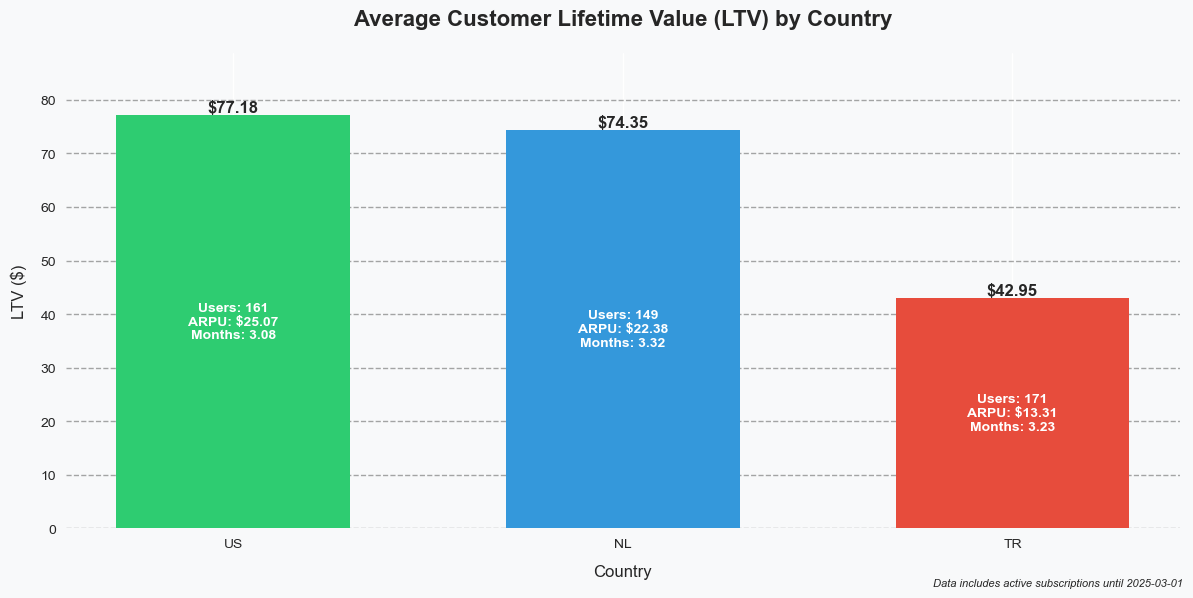

In [86]:
# Set style
plt.style.use('seaborn')
sns.set_palette("husl")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create bars with custom colors
colors = ['#2ecc71', '#3498db', '#e74c3c']  # Green, Blue, Red
bars = ax.bar(ltv_by_country['country'], ltv_by_country['ltv'], 
              color=colors, width=0.6)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:.2f}',
            ha='center', va='bottom',
            fontsize=12, fontweight='bold')

# Add title and labels with custom styling
ax.set_title('Average Customer Lifetime Value (LTV) by Country', 
             pad=20, fontsize=16, fontweight='bold')
ax.set_xlabel('Country', labelpad=10, fontsize=12)
ax.set_ylabel('LTV ($)', labelpad=10, fontsize=12)

# Customize grid
ax.grid(axis='y', linestyle='--', alpha=0.7, color='gray')
ax.set_axisbelow(True)  # Put grid behind bars

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add some padding to the y-axis
ax.set_ylim(0, max(ltv_by_country['ltv']) * 1.15)

# Add country-specific annotations
for i, row in ltv_by_country.iterrows():
    ax.text(i, row['ltv']/2,
            f"Users: {int(row['total_users'])}\nARPU: ${row['arpu']:.2f}\nMonths: {row['avg_months']:.2f}",
            ha='center', va='center',
            fontsize=10, color='white',
            fontweight='bold')

# Add a subtle background color
fig.patch.set_facecolor('#f8f9fa')
ax.set_facecolor('#f8f9fa')

# Add a footer note
plt.figtext(0.99, 0.01, 'Data includes active subscriptions until 2025-03-01',
            ha='right', va='bottom', fontsize=8, style='italic')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



In the country-wise **Lifetime Value (LTV) analysis**, the **US has the highest LTV at `77.18`**, followed by **the Netherlands at `74.35`**, while **Turkey lags behind at `42.95`**. The main reason for these differences is the **significantly lower Average Revenue Per User (ARPU) in Turkey (`13.31` vs. `25.07` in the US)**, as the **average subscription duration is quite similar across all countries (around 3-3.3 months)**. This suggests that **revenue optimization strategies** should be a focus in Turkey, whereas in the US and the Netherlands, **extending subscription duration through engagement and retention initiatives** could further increase LTV. Additionally, **country-specific pricing and marketing approaches** should be considered to create a more sustainable revenue model.


## BONUS Tasks (Optional)

7. Predict the churn probability for user #1002 (Clark Kent):
    - Use any relevant features from the dataset
    - Explain your model selection and feature engineering process
    - Provide confidence intervals if applicable

In [87]:
def analyze_user_status(user_id):
    """Detailed user status analysis"""
    
    # Get all user events
    events_query = """
    SELECT 
        u.id,
        u.country,
        u.attribution_source,
        u.created_at as join_date,
        ue.event_name,
        ue.created_at as event_date,
        ue.amount_usd
    FROM Users u
    LEFT JOIN User_Events ue ON u.id = ue.user_id
    WHERE u.id = ?
    ORDER BY ue.created_at;
    """
    
    # Get summary metrics
    metrics_query = """
    SELECT 
        COUNT(DISTINCT CASE WHEN event_name = 'app_install' THEN id END) as installs,
        COUNT(DISTINCT CASE WHEN event_name = 'trial_started' THEN id END) as trials,
        COUNT(DISTINCT CASE WHEN event_name = 'subscription_started' THEN id END) as subscriptions,
        COUNT(DISTINCT CASE WHEN event_name = 'subscription_renewed' THEN id END) as renewals,
        COUNT(DISTINCT CASE WHEN event_name = 'subscription_cancelled' THEN id END) as cancellations,
        COUNT(DISTINCT id) as total_events
    FROM User_Events
    WHERE user_id = ?;
    """
    
    events = pd.read_sql_query(events_query, conn, params=[user_id])
    metrics = pd.read_sql_query(metrics_query, conn, params=[user_id])
    
    print("=== User #1002 Status Analysis ===\n")
    
    print("1. Basic Information:")
    print(f"Country: {events['country'].iloc[0]}")
    print(f"Source: {events['attribution_source'].iloc[0]}")
    print(f"Join Date: {events['join_date'].iloc[0]}\n")
    
    print("2. Event Details:")
    print(events[['event_name', 'event_date', 'amount_usd']])
    print("\n3. Summary Metrics:")
    print(metrics)
    
    return events, metrics

# Run the analysis
events, metrics = analyze_user_status(1002)


=== User #1002 Status Analysis ===

1. Basic Information:
Country: TR
Source: organic
Join Date: 2025-02-16T00:00:00

2. Event Details:
    event_name           event_date amount_usd
0  app_install  2025-02-25T00:00:00       None

3. Summary Metrics:
   installs  trials  subscriptions  renewals  cancellations  total_events
0         1       0              0         0              0             1


#### Why Churn Analysis Cannot Be Performed
Churn probability analysis cannot be performed for this user as they have not yet utilized either 
the trial or paid version of the product. The user's only activity is application installation (app_install), 
with no trial initiation or subscription actions recorded. The necessary data for churn analysis, such as 
usage behavior, payment history, and engagement metrics, is not available. At this stage, activation potential 
should be evaluated instead of churn probability.